<a href="https://colab.research.google.com/github/manuel1729/Simulaci-n-1/blob/main/Flecha_Cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo: Gómez Cruz Manuel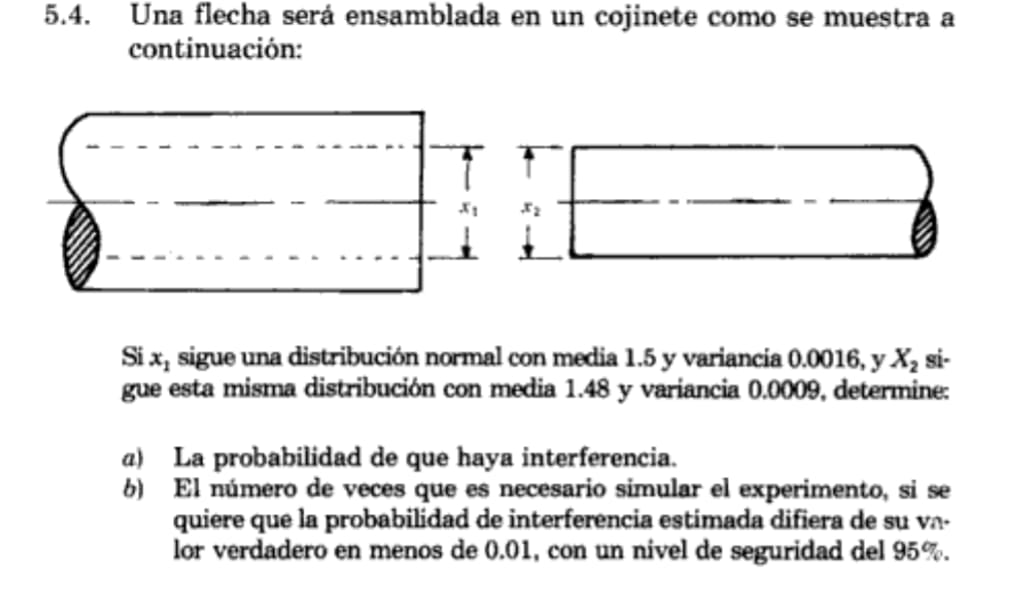

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

$x_2-x_1\geq 0$

$\mu_r=\mu_2-\mu_1$

$\sigma_r^2=\sigma_1^2+\sigma_2^2$

$X\sim N(\mu_2-\mu_1,\sqrt{\sigma_1^2+\sigma_2^2})=N(-0.02,0.05)$

$1-v=P(x_2-x_1\geq 0)=\int_{0}^{x_2-x_1}N(-0.02,0.05)dx=\int_0^{x_2 - x_1}\frac{1}{\sqrt{2\pi}(0.05)}e^{\frac{-(x+0.2)^2}{2(0.0025)}}dx$

(abuso de notaciuón)

In [23]:
#librería para calcular integral de la normal
import scipy.stats

prob = 1 - scipy.stats.norm.cdf(0, -0.02,0.05)
print("Proba de interferencia es: ", prob)


Proba de interferencia es:  0.3445782583896758


Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

$$x_1 \sim N(1.5,0.04)$$
$$x_2 \sim N(1.48,0.03)$$

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$x_1 \sim f(x)=\frac{1}{\sqrt{2\pi}(0.04)}e^{\frac{-(x-1.5)^2}{2(0.0016)}}$$

$$x_2 \sim f(x)=\frac{1}{\sqrt{2\pi}(0.03)}e^{\frac{-(x-1.48)^2}{2(0.0009)}}$$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

El mejor para generar las normales será Box-Muller, ya que es mejor aproximación, menos trabajo computacional como el método de las 12 uniformes o el de la aproximación con una v.a.

In [1]:
import numpy as np
import random

x1=np.random.normal(1.5,0.04,1)
x2=np.random.normal(1.48,0.03,1)

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

Condición de Interferencia:
$$x_2 \geq x_1$$

Buscamos $P(x_2 \geq x_1)$

**PASO 5**. Genere números aleatorios.

In [2]:
#Librerias y experimento para n veces
import numpy as np
import random
def experimento(n):
    suma=0
    for i  in range(n):
        x1=np.random.normal(1.5,0.04,1)
        x2=np.random.normal(1.48,0.03,1)
        if x2>=x1:
            suma+=1
    prob=suma/n
    return prob

**PASO 6**. Repetir M veces el experimento

In [21]:
def muestra(m):
    lista =[]
    for i in range(m):
        d =experimento(i+1)
        lista.append(d)
    return lista

In [10]:
n = 10 #10 pares de x_1,x_2
M=muestra(1000) #muestra
print('Media aprox muestra:',np.mean(M))
print('Varianza aprox muestra:', np.var(M))
print('Desviación estandar aprox muestra:', np.std(M))

Media aprox muestra: 0.34604099959268536
Varianza aprox muestra: 0.0013209461569777844
Desviación estandar aprox muestra: 0.03634482297353757


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

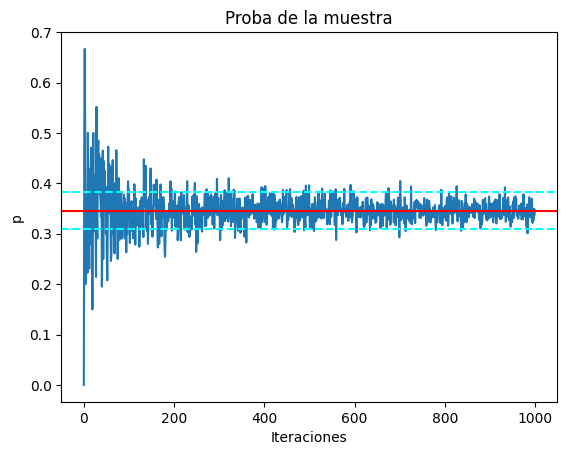

In [11]:
import matplotlib.pyplot as plt
#Gráfica de la estabilización
plt.plot(M)
plt.xlabel('Iteraciones')
plt.ylabel('p')
plt.title('Proba de la muestra')
plt.axhline(y=np.mean(M), color='r', label="media:")
plt.axhline(y=np.mean(M)+np.std(M),color='cyan', linestyle='--', label="Varianza")
plt.axhline(y=np.mean(M)-np.std(M), color='cyan', linestyle='--')
plt.show()

**PASO 8**. Replique el modelo.

In [12]:
#Veces que queremos repetir el experimento y agregarlo a una lista
def simulacion(repet):
    lista = []
    for i in range(repet):
        lista.append(np.mean(experimento(1000)))
    return lista

In [13]:
#Con repet=800 ya se veía una buena convergencia
simul = simulacion(800)

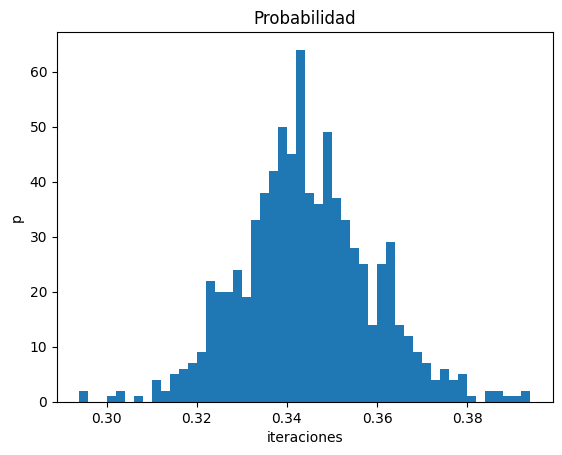

In [14]:
#Graficamos el historgrama
plt.hist(simul,bins=50)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de interferencia

In [15]:
print('Media simulada: ',np.mean(simul))
print('Varianza simulada: ', np.var(simul))
print('Desviación estandar simulada: ', np.std(simul))

Media simulada:  0.34399
Varianza simulada:  0.00021523239999999975
Desviación estandar simulada:  0.014670800932464449


**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interferencia con un nivel de confianza del $95 \%$.

El intervalo de confianza es.

$$\bar{x} \pm z\cdot \frac{\sigma}{\sqrt{n}}$$

In [19]:
n = 800 #tamaño muestra
z = 1.96  # para 95% de confianza
sigma = 0.05
#Calculo de la proba exacta
media = prob

# Intervalo de confianza
limite_inferior = media - (z*2*sigma) / np.sqrt(n)
limite_superior = media + (z*2*sigma) / np.sqrt(n)

print(f"Intervalo de confianza del 95%: ({limite_inferior:.4f}, {limite_superior:.4f})")

Intervalo de confianza del 95%: (0.3376, 0.3515)


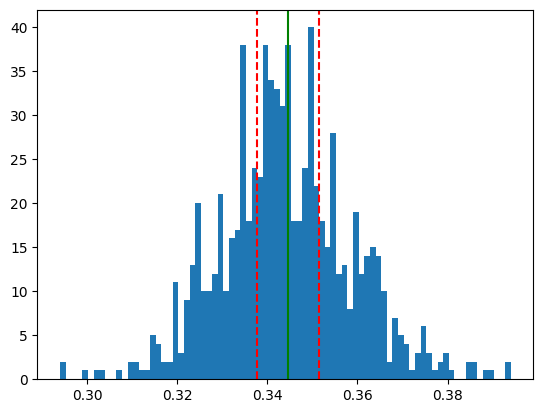

In [22]:
# Histograma con líneas del intervalo de confianza y en medio la media
plt.hist(simul, bins=80)
plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite inferior IC 95%')
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite superior IC 95%')
plt.axvline(media, color='green', linestyle='-', label='Media')
plt.show()